<a href="https://colab.research.google.com/github/Julianpucheta/HCSPD2025/blob/main/Semana%201/Semana_1_Simbolico_RLC_Octave_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución simbólica en un circuito RLC

Se resuelve la ecuacion diferencial del circuito RLC de la figura.

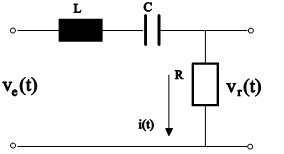

Las ecuaciones son

$\frac{di(t)}{dt}=-\frac{R}{L}i(t)-\frac{1}{L}v_c(t)+\frac{1}{L}v_e(t)\\
\frac{dv_c(t)}{dt}=\frac{1}{C}i(t)$

con las condiciones iniciales nulas para la corriente $i(0)=0$ y la tensión del capacitor $v_c(0)=0$.

## Instalación de Octave en el entorno Colab
Se instala el programa Octave, y las librerías necesarias.

In [ ]:
# !apt-get update #Usar para actualizar librerias, únicamente

In [ ]:
!apt install octave #Instala colab en el entorno de trabajo

In [ ]:
# https://gnu-octave.github.io/packages/
# https://github.com/gnu-octave/symbolic
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python

In [3]:
%%writefile Inst_S.m
pkg install -forge symbolic

Writing Inst_S.m


In [4]:
!octave -W Inst_S.m #  corre el código adentro de Octave pkg install -forge symbolic

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


In [ ]:
# !pip install --user sympy==1.5.1 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige

In [ ]:
# No anda !pip install --user sympy==1.11 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige

In [19]:
%%writefile Calculo_RLC_Simbolico.m
clear all; clc;
%setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic
%/usr/bin/python
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
%R=2.2e3;L=10e-6;C=100e-9; Va=12.;
R=1.;L=1.;C=1.;Va=1.;
syms ii(t) vc(t)
ode2=diff(vc)==ii/C;
ode1=diff(ii)==-R/L*ii-1/L*vc+1/L*heaviside(0,1)*Va;
%ode1=diff(ii)==-ii-vc+heaviside(0,1); %heaviside(0) devuelve .5
cond1 = ii(0) == 0;
cond2 = vc(0) == 0;
conds = [cond1,cond2];
odes = [ode1, ode2];
%Sol=dsolve(odes,ii(0) == .0,vc(0) == .0);
Sol=dsolve(odes,conds);
Corriente=simplify(Sol.ii);
Tension=simplify(Sol.vc);
disp('Corriente:')
latex(Corriente)
char(Corriente)
disp('Tensión:')
latex(Tension)
char(Tension)

Overwriting Calculo_RLC_Simbolico.m


Luego de generar el archivo .m en el entorno, se puede ejecutar al Octave con los comandos de línea.

In [20]:
!octave -W Calculo_RLC_Simbolico.m # -W : no window system

Symbolic pkg v3.2.1: Python communication link active, SymPy v1.13.1.
<stdin>:7: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

Corriente:
\frac{2 \sqrt{3} e^{- \frac{t}{2}} \sin{\left(\frac{\sqrt{3} t}{2} \right)}}{3}
ans = 2*sqrt(3)*exp(-t/2)*sin(sqrt(3)*t/2)/3
Tensión:
1 - \frac{2 \sqrt{3} e^{- \frac{t}{2}} \sin{\left(\frac{\sqrt{3} t}{2} + \frac{\pi}{3} \right)}}{3}
ans = 1 - 2*sqrt(3)*exp(-t/2)*sin(sqrt(3)*t/2 + pi/3)/3



### Resultados


Corriente:
$\frac{2 \sqrt{3} e^{- \frac{t}{2}} \sin{\left(\frac{\sqrt{3} t}{2} \right)}}{3}$

Tensión:
$1 - \frac{2 \sqrt{3} e^{- \frac{t}{2}} \sin{\left(\frac{\sqrt{3} t}{2} + \frac{\pi}{3} \right)}}{3}$


# Verificación numérica

Se simula el valor analítico obtenido para compararlo con el cómputio por Euler.
Queda como ejercicio cambiar los valores de R, L, C y Va para analizar otros casos.


In [56]:
%%writefile Verificacion_Num.m
clc;clear all;
warning('off','all');
X=-[0; 0];ii=0;t_etapa=1e-1;wRef=2;tF=1e2;
color_='r.-';
color='b--';
Ts=t_etapa;
u=1;
% x1(1)=X(1);%corriente
% x2(2)=X(2);%tensión en el capacitor
for t=0:t_etapa:tF
  ii=ii+1;k=ii+2;
  x1(ii)=X(1);%corriente
  x2(ii)=X(2);%tensión en el capacitor
  X=modrlc(t_etapa, X, u);
  acc(ii)=u;
  x1_analitica(ii) = 2*sqrt(3)*exp(-t/2)*sin(sqrt(3)*t/2)/3;
  x2_analitica(ii)= 1 - 2*sqrt(3)*exp(-t/2)*sin(sqrt(3)*t/2 + pi/3)/3;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x1,color_);title('x_1 corriente'); hold on;
plot(t,x1_analitica,color);  legend('Numerica','Analitica');
subplot(3,1,2);hold on;
plot(t,x2,color_);title('x_2 Vc_t');hold on;
plot(t,x2_analitica,color);
subplot(3,1,3);hold on;
plot(t,acc,color);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
%figure(1)
%figure(2)
print(hfig1,'Vars_temporal','-r200','-dpng');
save('Verificacion_Num_1.mat','-v7');

Overwriting Verificacion_Num.m


In [31]:
%%writefile modrlc.m
%Funcion modelo
function [X]=modrlc(t_etapa, xant, accion)
%h=1e-9;t_simul=1e-3;R=2.2e3;L=10e-6;C=100e-9;
h=1e-3;R=1;L=1;C=1;
A=[-R/L, -1/L;1/C,0];B=[1/L;0];%
% eig(A)
% 1./ans
C=[R 0];u=accion;
x=xant;
for ii=1:t_etapa/h
  xp=A*x+B*u;
  x=x+xp*h;
end
X=[x];%x1 corriente, x2 tensión

Overwriting modrlc.m


In [57]:
# -W : no window system
!octave -W Verificacion_Num.m
import scipy.io
mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

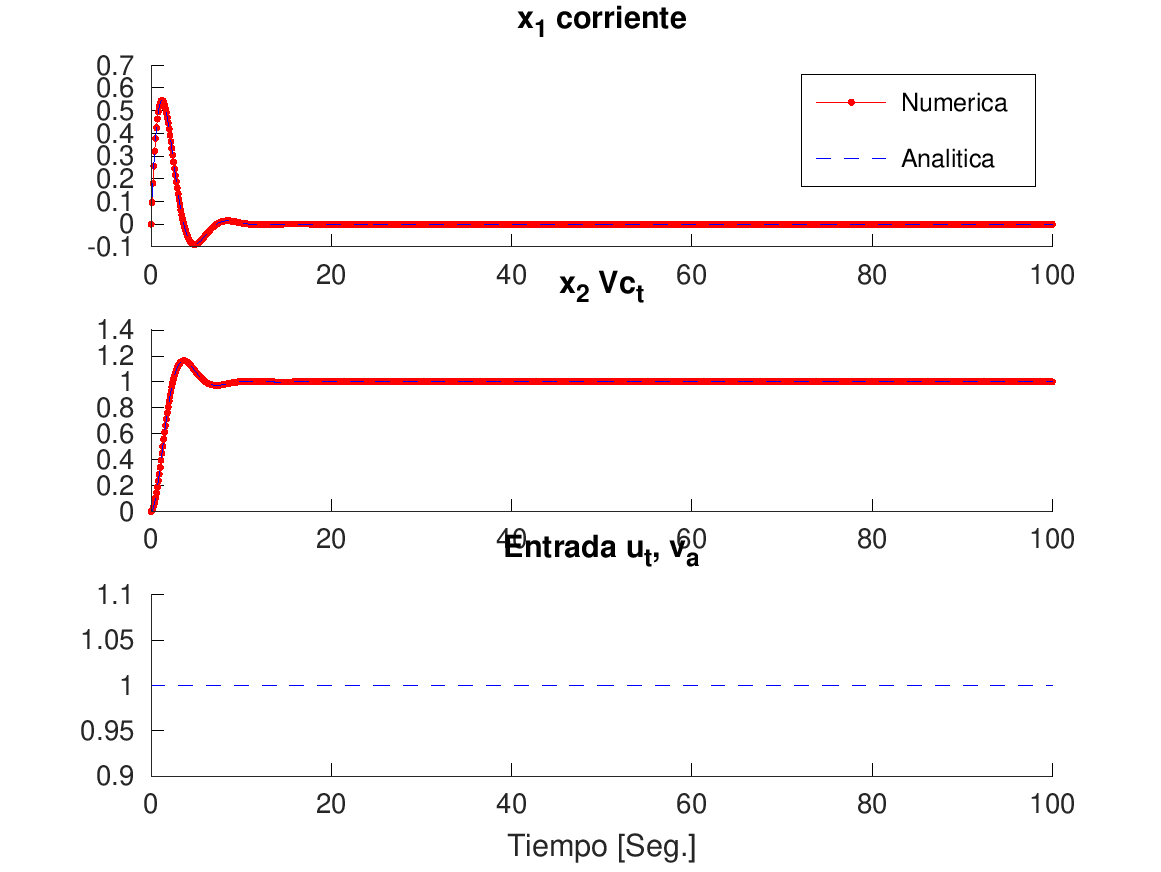

In [58]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt

In [ ]:
from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
drive.mount('/content/drive')

In [ ]:
# !cp Vars_temporal.png /content/drive/MyDrive/CursoHCSPD2024 #Copia uno por uno
import os
import shutil
fnames = ['Vars_temporal.png','Calculo_RLC_Simbolico.m','Verificacion_Num.m','Verificacion_Num_1.mat','modrlc.m'] #Acá van los nombres de los archivos que desean copiarse al Gdrive
for fname in fnames:
  src = os.path.join('/content', fname)
  dst = os.path.join('/content/drive/MyDrive/CursoHCSPD2024', fname)
  shutil.copyfile(src, dst)

# Simulación numérica del avión
Se realiza la simulación por Euler del modelo simplificado del avión

$\dot{\alpha}=a\cdot(\phi-\alpha)$, $\ddot\phi=-\omega^2\cdot(\phi-\alpha-b\cdot{u_t})$, $\dot{h}=c\cdot\alpha$.

In [ ]:
%%writefile Avion_Num.m
clc;clear all;
warning('off','all');
X=-[0; 0;0;0];t_etapa=10e-3;
tF=5;
color_='r';
color='b';
Ts=t_etapa;
u=1;
ii=0;
for t=0:t_etapa:tF
  ii=ii+1;
  x2(ii)=X(2);%Ángulo fi
  x4(ii)=X(4);%tensión en el capacitor
  X=modavion(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x2,color_);title('x_2 angulo fi'); hold on;
%plot(t,x1_analitica,color);title('x_1 corriente'); hold on;
subplot(3,1,2);hold on;
plot(t,x4,color_);title('x_4 Altura');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
%figure(1)
%figure(2)
print(hfig1,'VarsAvion_temporal','-r300','-dpng');
save('Verificacion_Num_1Avion.mat','-v7');

Overwriting Avion_Num.m


In [ ]:
%%writefile modavion.m
%Funcion modelo
function [X]=modavion(t_etapa, xant, accion)
%xant=[alfa,fi,fi_p,h]
a=0.01; b=2; c=100;
omega=0.2;
At=1e-3;
u=accion;
%xant=[alfa,fi,fi_p,h]
alfa=xant(1);
fi=xant(2);
fi_p=xant(3);
h=xant(4);
x=xant;
for ii=1:t_etapa/At
  %xp=A*x+B*u;
  alfa_p=a*(fi-alfa);
  fi_pp=(-omega^2)*(fi-alfa-b*u);
  h_p=c*alfa;
  xp=[alfa_p;fi_p;fi_pp;h_p];
  x=x+xp*At;
  fi_p=xp(2);
  alfa=x(1);
  fi=x(2);
  fi_p=x(3);
  h=x(4);
end
X=[x]; %

Writing modavion.m


In [ ]:
# -W : no window system
!octave -W Avion_Num.m
# import scipy.io
# mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

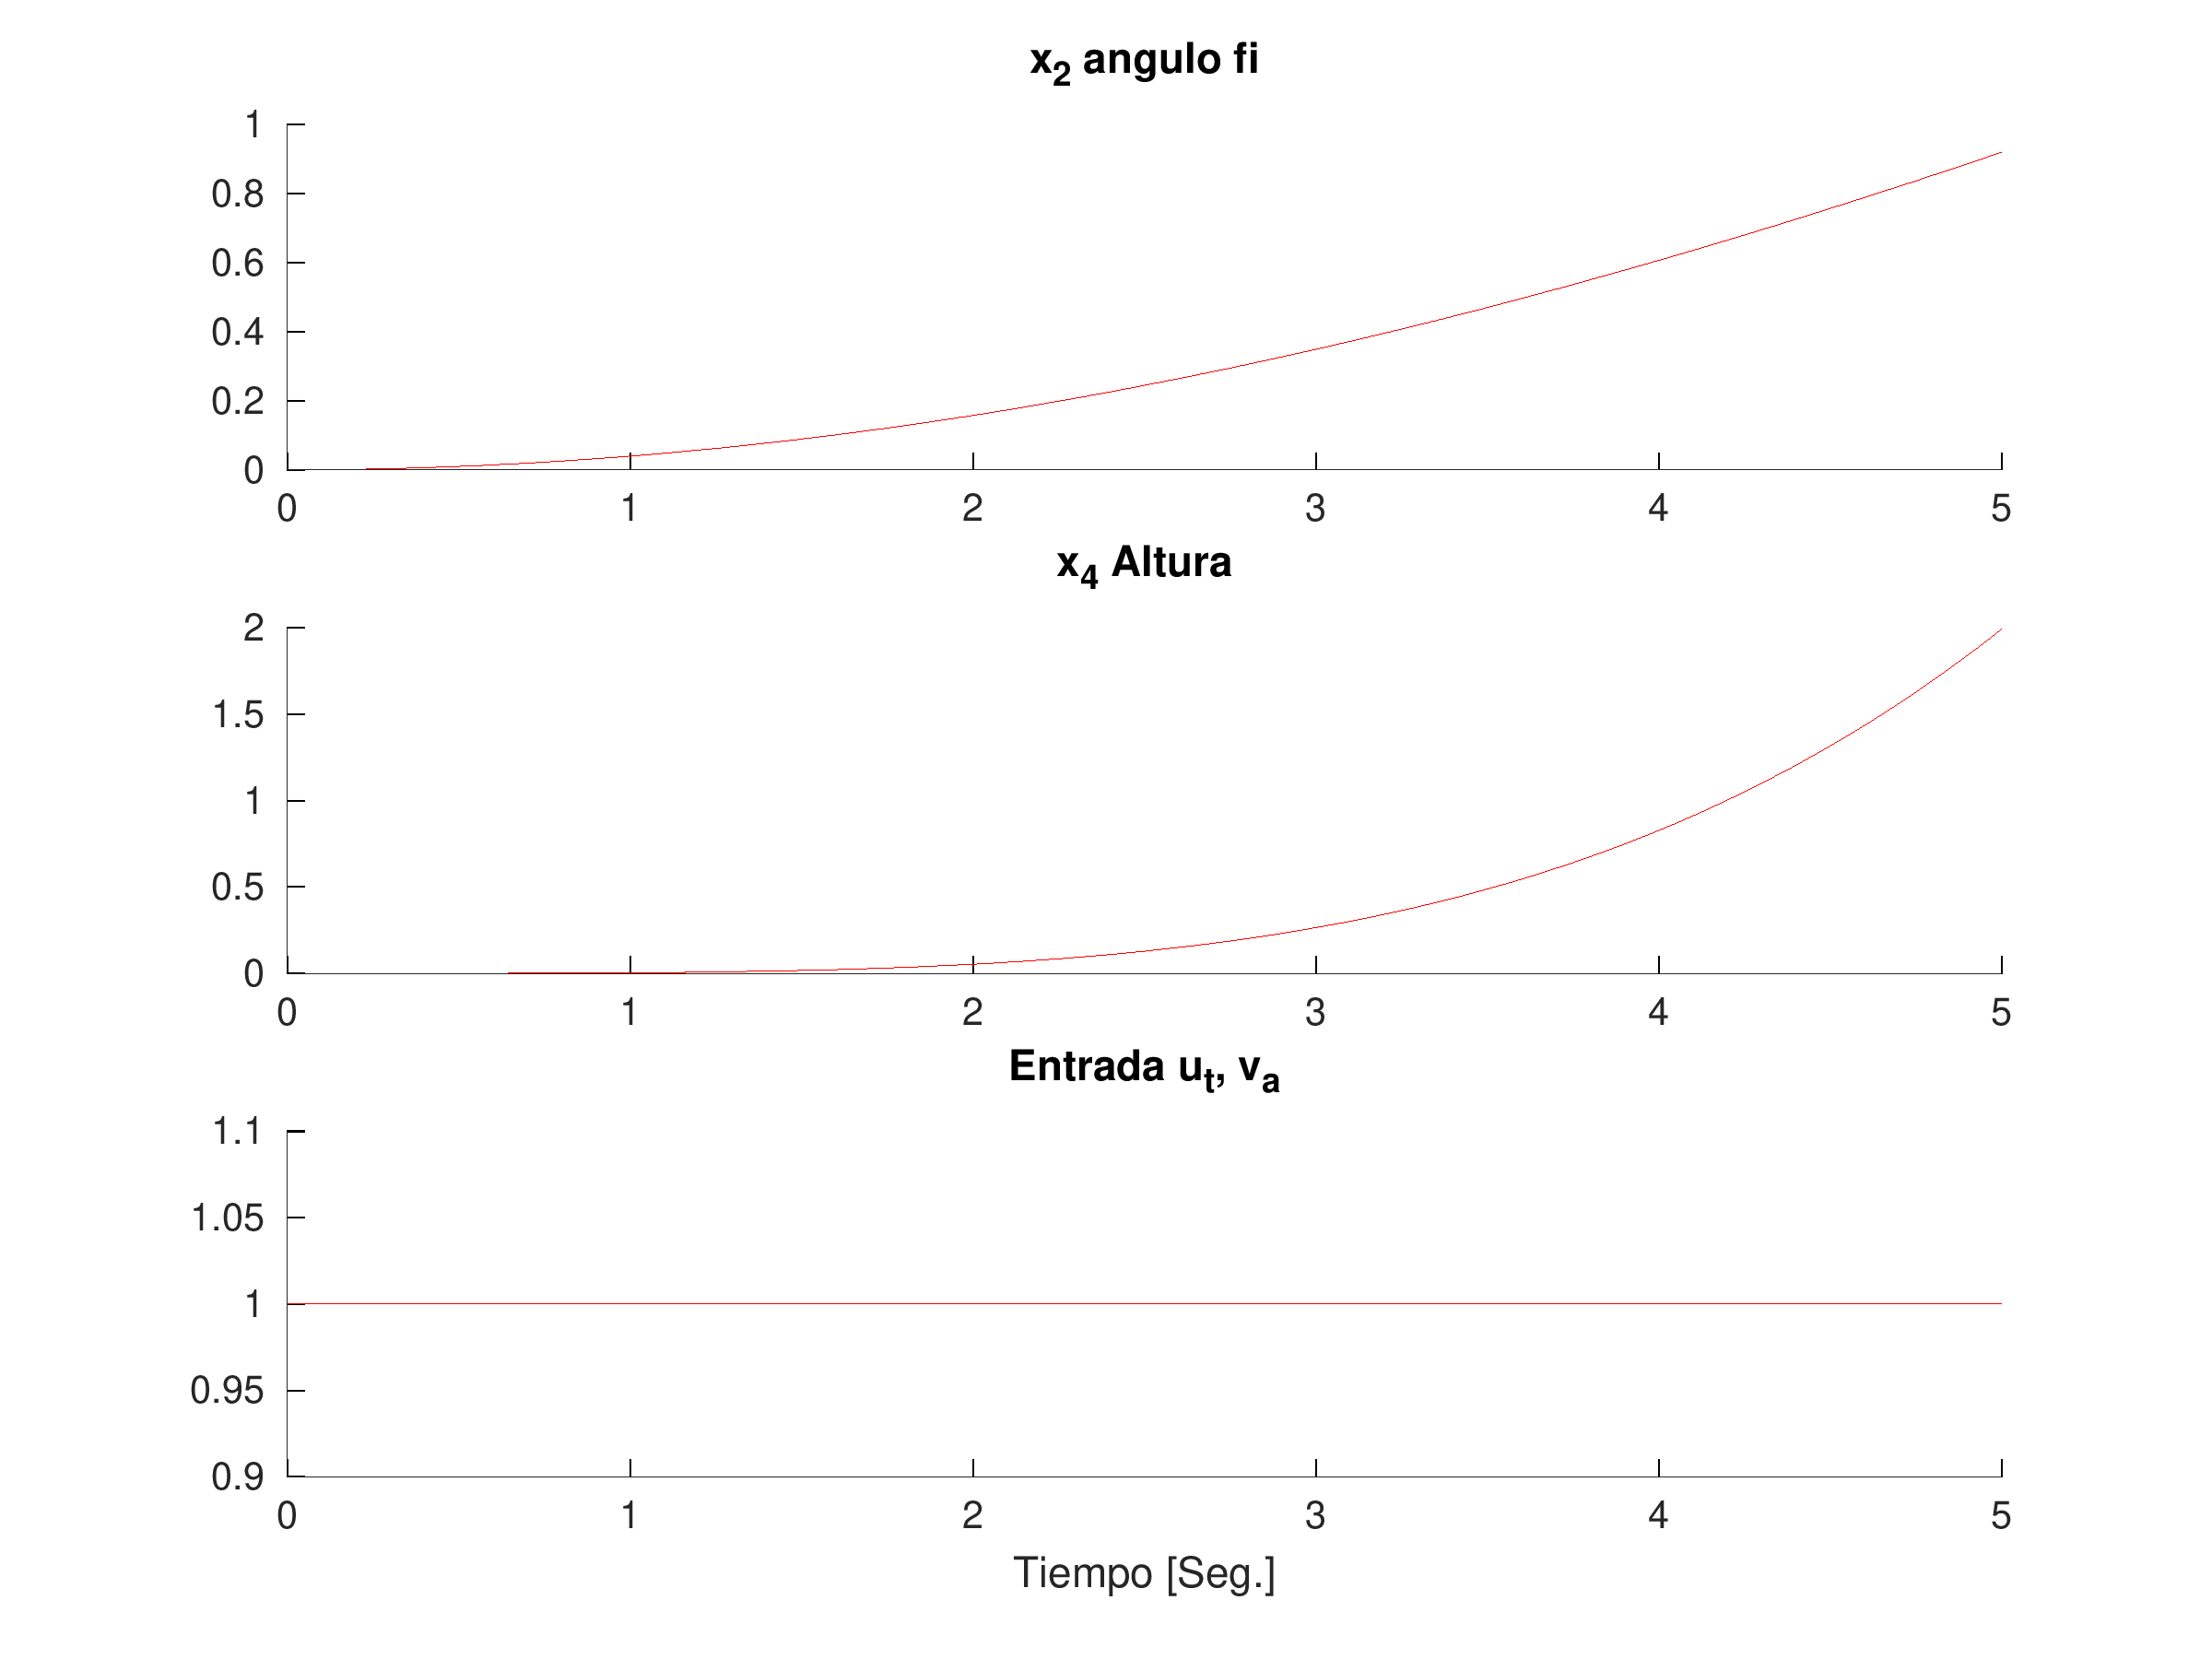

In [ ]:
from PIL import Image
imt = Image.open("/content/VarsAvion_temporal.png")
imt

# Cierre
Para guardar todos los archivos y las imágenes generadas en el Gdrive, se puede proceder mediante el montado en el entorno de trabajo, y luego copiar todo mediante Python. Con la instrucción de Linux `!cp archivo dir_destino` se puede copiar uno por uno todos los archivos.

In [ ]:
from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp Vars_temporal.png /content/drive/MyDrive/CursoHCSPD2024 #Copia uno por uno
import os
import shutil
fnames = ['VarsAvion_temporal.png','Verificacion_Num_1Avion.mat','Avion_Num.m','modavion.m'] #Acá van los nombres de los archivos que desean copiarse al Gdrive
for fname in fnames:
  src = os.path.join('/content', fname)
  dst = os.path.join('/content/drive/MyDrive/CursoHCSPD2024', fname)
  shutil.copyfile(src, dst)

Impresión a un archivo pdf con marcadores en cada título.

In [ ]:
!apt-get upgrade
# !apt-get update #Casi nunca es necesario

In [ ]:
%%shell
sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic  --fix-missing #funciona ok

In [ ]:
%%shell
sudo apt-get install pandoc

In [ ]:
!pip install pandoc

In [ ]:
import pandoc

## Para guardar en Gdrive el pdf

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Go to the directory where your file is
%cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
# Verify that now you see your notebooks
!ls

In [ ]:
#Da mensajes de WARNING, pero funciona.
%%shell
pandoc --to pdf --pdf-engine=xelatex  --from ipynb -o 'Semana_1_Simbolico_RLC_Octave_Colab.pdf' 'Semana_1_Simbolico_RLC_Octave_Colab.ipynb'

In [ ]:
import nbconvert # Luego, debe descargarse el nb actual y subirse al entorno

In [ ]:
%%shell
# jupyter nbconvert --to html /content/TP_Nº1.ipynb
jupyter nbconvert --to html Semana_1_Simbolico_RLC_Octave_Colab.ipynb
## /content/TP_Nº1.ipynb # Descargar el html y luego imprimirlo a pdf

[NbConvertApp] Converting notebook Semana_1_Simbolico_RLC_Octave_Colab.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 525060 bytes to Semana_1_Simbolico_RLC_Octave_Colab.html


In [ ]:
!pip install nbconvert[webpdf] #web pdf permite generar el pdf mediante el html

In [ ]:
%%shell
jupyter nbconvert --to webpdf --allow-chromium-download Semana_1_Simbolico_RLC_Octave_Colab.ipynb